In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
from tqdm import trange

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def display_images(in_, out, n=1):
    def to_img(x):
      x = 0.5 * (x + 1)
      x = x.view(x.size(0), 28, 28)
      return x

    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')


In [ ]:
batch_size = 256

img_transform = transforms.Compose(
    [
      transforms.ToTensor(),  
      transforms.Normalize((0.5),(0.5)) 
    ]
)
dataset = MNIST('./data', transform= img_transform, download= True)
dataloader = DataLoader(dataset, batch_size= batch_size, shuffle= True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
d = 500 

class Autoencoder(nn.Module):

  def __init__(self) -> None:
      super().__init__()
      self.encoder = nn.Sequential(
          nn.Linear(28*28,d),
          nn.Tanh()
      )
      self.decoder = nn.Sequential(
          nn.Linear(d,28*28),
          nn.Tanh()
      )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [ ]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [ ]:
lr = 1e-3
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = lr
)

In [ ]:
NUM_EPOCHS = 20

NOISE_STD = 0.6

do = nn.Dropout()

for epoch in trange(NUM_EPOCHS):

  for data in dataloader:

    img, _ = data
    img = img.to(device)
    img = img.view(img.size(0),-1)

    # For Dropout
    noise = do(torch.ones(img.shape)).to(device)
    img_bad = (img*noise).to(device)

    # Gaussian Noise
    # img_bad = img + torch.FloatTensor(img.size()).normal_(std = NOISE_STD)
    output = model(img_bad)

    loss = criterion(output, img.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  

100%|██████████| 20/20 [04:32<00:00, 13.65s/it]


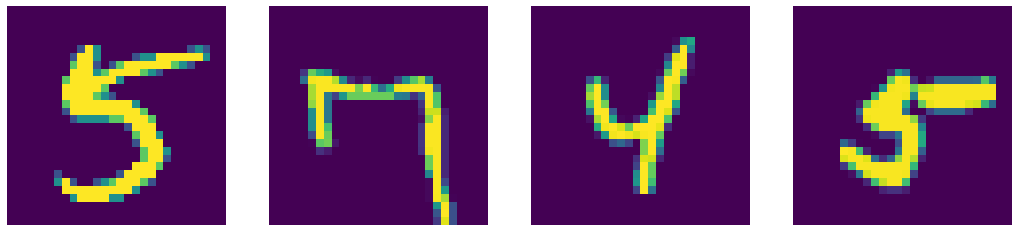

In [ ]:
display_images(None, img)

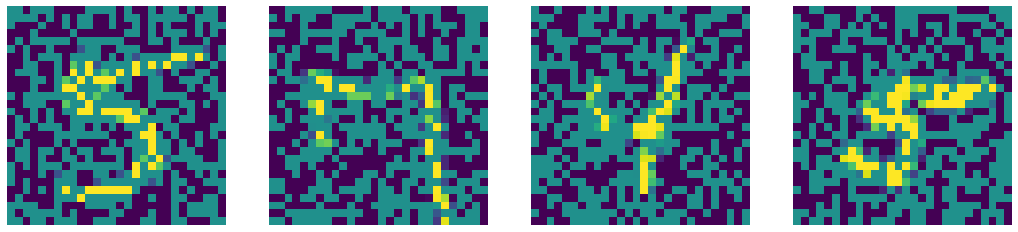

In [ ]:
display_images(None, img_bad)

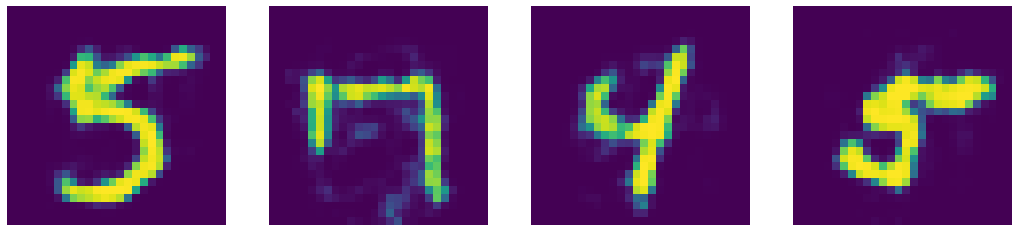

In [ ]:
display_images(None, output)

# Also see T-SNE Visualization at 
https://github.com/nyumc-dl/BMSC-GA-4493-Spring2020/blob/master/lab7/lab7.ipynb